<!-- Установка глобальных параметров страницы -->
<div style="color: #A4A4A4; background: #020015; padding-left: 15px; padding-right:10px;  width: 97%"><br>  
<p class="h1-unit" style="padding-left: 50px; font-size: 1.2em">Python. Прогнозирование временных рядов с использованием Auto ARIMA</p>  
<div class="grey-container">
Данный текст является переводом этой <a href="https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd"><font color='green'>статьи</font></a>. Автор ─ <yn>Syshmitha Pulagam</yn> (Сушмитха Пулагам). Перевод ─ Сергей Неустроев.
</div> <br>
  
В данной статье показано как использовать для прогнозирования Auto ARIMA в <i>Python</i> с применением пакета <fonb>pmdarima</fonb>.  
<p style="text-align: center;"><img src="https://img.kapital.kz/5U6TbmDlRK8/czM6Ly9rYXBpdGFsLXN0YXRpYy9pbWcvYi8wL2UvOS9kLzQwMzIyMGM1ZDRlY2M1M2IxMTJkYTBlZjAxMi53ZWJw" width=65%></img></p>
  
*Анализ временных рядов является одним из основных навыков любого Data Scientist-а, часто бывает ситуация, когда нужно сделать прогноз, анализируя прошедшие и текущие данные.* <br><br>  
  
<strong style="color: white">Что такое временной ряд?</strong>
  
Это серия наблюдений, которая проводится чаще всего с равными интервалами и в определённое время. Временной ряд используется для прогнозирования на основе анализа предыдущих данных. Наблюдаемые компоненты при этом анализе ─ это тренд (Trend), сезонность (Seasonal), нерегулярность (Irregular) и цикличность (Cyclicity).  
  
Если в наборе данных в каждый момент времени наблюдается только одна переменная, то они называются «одномерными временными рядами (Univariate Time Series)»; при наблюдении в каждый момент времени двух и более переменных они называются «многомерными временными рядами (Multivariate Time Series)».  
  
В этой статье мы рассмотрим одномерные временные ряды для прогнозирования продаж с помощью функции <comm>Auto ARIMA</comm>. Используем <i>Python</i>, <comm>Auto ARIMA</comm> в <i>Python</i> почти аналогична <comm>Auto ARIMA</comm> в <i>R</i>. <br><br>  
  
<strong style="color: white">Зачем использовать Auto ARIMA?</strong>
  
B базовой модели <comm>ARIMA</comm> необходимо представлять значения <em style="color: white; font-size: 1.2em;">p, d</em> и <em style="color: white; font-size: 1.2em;">q</em>. Для получения этих значений мы используем статистические методы, определяя порядок дифференцирования <em style="color: white; font-size: 1.2em;">d</em> и выстраивая диаграммы ACF и PACF, чтобы узнать <em style="color: white; font-size: 1.2em;">p</em>  и <em style="color: white; font-size: 1.2em;">q</em>.  
<font color=lightblue>Модель Auto ARIMA сама генерирует оптимальные значения <em style="color: white; font-size: 1.2em;">p, d, q</em>, обеспечивающих лучшее прогнозирование в наборе данных.</font> <br><br>  
  
Если у вас нет пакета <fonb>pmdarima</fonb>, то его необходимо установить.  
  
Обратите внимание, что раньше этот пакет назывался «Pyramid», а затем был изменён на «pmdarima». Убедитесь, что вы устанавливаете пакет <fonb>pmdarima</fonb>.<br><br> 
  
👉 <strong style="color: white">Шаг 1: установка пакета «pmdarima»</strong>
  
Пакет можно установить из ячейки <i>Jupyter</i> с помощью следующей команды:  
<div class="cod">

``` python
! pip install pmdarima
```
</div>
  
Чтобы убедиться, что пакет собран правильно, используйте следующую команду:  
<div class="cod">

``` python
from pmdarima.arima import auto_arima
```
</div>
  
Чтобы узнать более подробно об установке пакета <fonb>pmdarima</fonb> перейдите по этой <a href="https://alkaline-ml.com/pmdarima/setup.html"><font color='green'>ссылке</font></a>.
  
Датасет, с которым мы будем работать, представляет собой набор данных о ежемесячных продажах шампанского в период с 1964 по 1972 года. Данный набор можно скачать <a href="https://github.com/SushmithaPulagam/TimeSeries_Auto-ARIMA"><font color='green'>здесь</font></a>.<br><br>
  
👉 <strong style="color: white">Шаг 2: подготовка данных</strong>  
  
Загрузив датафрейм, убедимся, что в нём нет нулевых значений, а также изменим тип данных признака «Month» на *Datatime*. Помимо этого, определим «Month» как индекс, используя метод <fonb>set_index</fonb>.  
<div class="cod">

``` python
import pandas as pd

# Загрузка датасета
sales_data = pd.read_csv('data/Champagne Sales.csv', 
    parse_dates=["Month"], index_col = ["Month"])
sales_data.head()
```
</div> <br>
  
👉 <strong style="color: white">Шаг 3: определение структуры</strong>
  
Чтобы рассмотреть структуру данных, нужно построить график, используя метод <fonb>.plot()</fonb>.
<div class="cod">

``` python
sales_data.plot();
```
</div>  
  
На диаграмме видно, что в данных присутствует сезонность. Всплеск продаж наблюдается каждый год, начиная с 1964 года и заканчивая 1972 годом.  
  
👉 <strong style="color: white">Шаг 4: тест на стационарность</strong>  
  
Стационарность является важной концепцией временных рядов. Прежде чем приступить к моделированию, временной ряд обязательно нужно проверить на стационарность.  
  
Для проверки на стационарность ряда мы используем «Augmented Dickey-Fuller Test (расширенный тест Дики-Фуллера)», который доступен в пакете <fonb>pmdarima</fonb>  
<div class="cod">

``` python
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

# 0.01, False
```
</div>
  
Тест показал, что данные нестационарны. Следовательно, мы выбираем концепцию «Integrated (I)». Параметр концепции «Integrated» обозначается во временных рядах как порядок дифференцирования <em style="color: white; font-size: 1.2em;">d</em> после которого ряд становится стационарным при построении модели <comm>Auto ARIMA</comm>.  
  
👉 <strong style="color: white">Шаг 5: разделение на Train и test</strong>  
  
Проведём разделение данных на Train и test. Далее мы будем строить модель на подвыборке Train и прогнозировать с помощью test.
<div class="cod">

``` python
Train = sales_data[:85]
test = sales_data[-20:]
plt.plot(train)
plt.plot(test)
plt.title('Построение Train и test');
```
</div>
  
👉 <strong style="color: white">Шаг 6: построение модели <comm>Auto ARIMA</comm></strong>

<h1 style="padding-left:40px;">AR I MA</h1>
  
<strong style="color: white">AR ─ Auto Regressive</strong> <em style="color: white; font-size: 1.2em;">(p)</em>─ количество лагов авторегрессии.  
  
<strong style="color: white">I ─ Integrated</strong> <em style="color: white; font-size: 1.2em;">(d)</em>─ порядок дифференцирования, количество «взятия разностей рядов».  
  
<strong style="color: white">MA ─ Moving Average</strong> <em style="color: white; font-size: 1.2em;">(q)</em>─ порядок скользящего среднего.  
  
Обратите внимание, в модели Auto ARIMA строчные буквы <em style="color: white; font-size: 1.2em;">p, d, q</em> представляют несезонные компоненты, а заглавные <em style="color: white; font-size: 1.2em;">P, D, Q</em> ─ сезонные. Поиск оптимальных параметров <em style="color: white; font-size: 1.2em;">p, d, q</em> с различными комбинациями происходит так же, как и в гипернастройках и окончательные значения определяются с учётом более низких параметров AIC, BIC.  
  
В коде ниже мы пытаемся со значениями <em style="color: white; font-size: 1.2em;">p, d, q</em> в диапазоне от <em style="color: white; font-size: 1.2em;">0</em> до <em style="color: white; font-size: 1.2em;">5</em> получить лучшие значения модели. В ней есть много других параметров и чтобы узнать больше о её функциональности, перейдите по <a href="https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html"><font color='green'>этой ссылке</font></a>.  
<div class="cod">

``` python
arima_model = auto_arima(Train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace=True,
                        supress_warnings=True, stepwise=True,
                        random_state=20, n_fits=50)
```
</div>
  
Далее выведем краткое описание модели:  
<div class="cod">

``` python
arima_model.summary()
```
</div>
  
👉 <strong style="color: white">Шаг 7: прогнозирование на test</strong>
  
Используем обученную модель, построенную на предыдущем этапе для прогнозирования продаж на валидационных данных.  
<div class="cod">

``` python
predication = pd.DataFrame(arima_model.predict(n_periods=20), index=test.index)
prediction.columns = ['predicted_sales']
prediction
```
</div>
  
Построим график с прогнозом продаж на тестовых данных:  
<div class="cod">

``` python
plt.figure(figsize=(8,5))
plt.plot(Train, label='Training')
plt.plot(test, label='test')
plt.plot(prediction, label='Predicted')
plt.legend(loc='Left corner')
plt.show();
```
</div>
  
И определим метрику <em>R2-score</em>:  
<div class="cod">

``` python
from sklearn.metrics import r2_score

test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])
```
</div> <br>  
  
<strong style="color: white">Резюме</strong>  
  
В этой статье мы узнали, как использовать функциональные возможности модели Auto ARIMA. Данный подход полезен, если необходимо сгенерировать значения <em style="color: white; font-size: 1.2em;">p, d, q</em> из самой модели. Когда мы используем базовые модели <comm>ARIMA</comm> или <comm>SARIMA</comm>, то нам необходимо выполнять дифференцирование для приведения ряда к стационарному виду и строить графики ACF и PACF, чтобы определить значения <em style="color: white; font-size: 1.2em;">p</em> и <em style="color: white; font-size: 1.2em;">q</em>, а это требует много времени.  
  
Тем не менее, а особенно, если вы новичок во временных рядах, всегда рекомендуется использовать статистические методы и применять базовую модель <comm>ARIMA</comm>, чтобы на интуитивном уровне понять значения <em style="color: white; font-size: 1.2em;">p, d</em> и <em style="color: white; font-size: 1.2em;">q</em>.  
  
Набор данных и полный код вы можете загрузить на моём <a href="https://github.com/SushmithaPulagam/TimeSeries_Auto-ARIMA"><font color='green'>GitHub</font></a>.  
  
Спасибо за то, что вы прочитали мою статью и счастливого обучения! 🙂 
<!-- Конец глобальной страницы -->
<br></div>



















<style>

.h1-unit {
    font-weight: bold;
    font-family: 'arial';
    display: block;
    text-align: center;
    font-size: 1.8em;
    /* text-transform: uppercase; */
    color: #89DDFF;
}

/* Серый блок для сносок и примеров*/
.grey-container {
    background-color: #2e2e34;
    padding: 0.8em;
    /* padding: 20px; */
    /* margin-top: 20px; */
    /* margin-bottom: 20px; */
    border: 3px solid #404040;
    width: 96%;
    /* margin: 0 auto; */
    color: rgb(183, 183, 183);
    border-radius: 10px;
    /* Радиус скругления */
    box-shadow: 0 0 7px #666;
    /* Параметры тени */
}

/* жёлтый, нормальный */
yn {
    color: darkorange;
    font-weight: normal;
    font-family: Consolas;
}

/* Оформление цвета курсива */
i {
    color: rgb(142, 142, 219);
    font-family: 'Times New Roman';
    font-size: 1.2em;
}

/* Комментарии, курсив */
comm {
    color: #008800;
    font-weight: normal;
    font-style: italic;
    font-family: Consolas;
    font-size: 1.15em;
}

ft {
    color: white;
    font-size: 1.1em;
}

/* Подсветка для кода*/
fonb {
    /* background-color: #f0f8ff; */
    /* background-color: #001E7A; */
    background-color: #001E5B;
    font-family: Courier New, courier;
    color: white;
    font-size: 0.9em;
}

/* блок для программного кода */
.cod {
    width: 90%;
    background: #050621;
    padding-top: 15px;
    padding-left: 10px;
    border: solid 1px #2e765e;
}

/* Оформление ссылки: подчеркивание, фон и т. п.  */
a {
    border-bottom: 1px solid green;
}

a:hover {
    background: #00105E;
    text-decoration: none;
    border-bottom: 1px solid blue;
}

</style>

In [2]:
import pandas as pd

url='https://raw.githubusercontent.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/master/Champagne%20Sales.csv'
df = pd.read_csv(url, index_col=0)
df

,Champagne sales
Month,
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
...,...
1972-05,4618
1972-06,5312
1972-07,4298


In [3]:
""" == ШАГИ 1 и 2. Загрузка и подготовка данных ==="""

import pandas as pd

# Загрузка датасета
url='https://raw.githubusercontent.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/master/Champagne%20Sales.csv'
sales_data = pd.read_csv(url).reset_index(drop=True)
display(sales_data.head(3))

# Проверка на zero
zero = sales_data[sales_data['Champagne sales'] == 0].shape[0]
print("Нулевых значений не обнаружено") if zero == 0 else zero

# Установка индекса и приведение к timedate
sales_data['Month'] = pd.to_datetime(sales_data['Month'])
sales_data.set_index('Month', inplace=True)
sales_data.head(7)

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755


Нулевых значений не обнаружено


,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
1964-06-01,3036
1964-07-01,2282


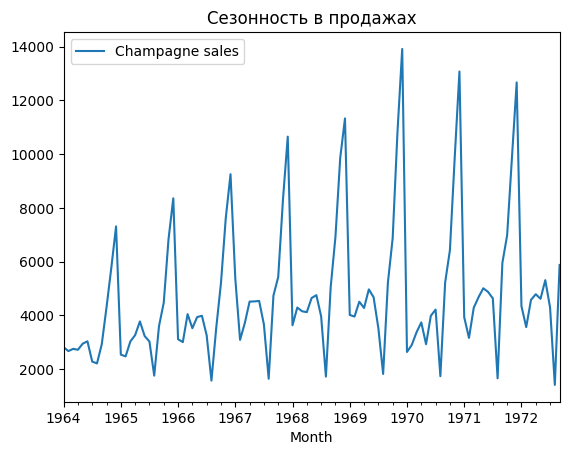

In [4]:
""" == ШАГ 3: определение структуры == """

import matplotlib.pyplot as plt

sales_data.plot();
plt.title('Сезонность в продажах');

In [5]:
""" == ШАГ 4: тест на стационарность == """

from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

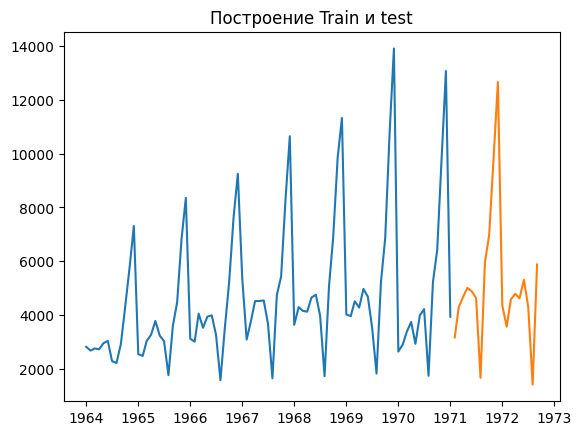

In [6]:
""" == ШАГ 5: разделение на Train и test == """

Train = sales_data[:85]
test = sales_data[-20:]
plt.plot(Train)
plt.plot(test)
plt.title('Построение Train и test');

In [7]:
""" == ШАГ 6: построение модели Auto ARIMA == """

from pmdarima import auto_arima

arima_model = auto_arima(Train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace=True,
                        supress_warnings=True, stepwise=True,
                        random_state=20, n_fits=50)

arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.11 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.27 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.707, Time=0.82 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.27 sec
 ARIMA(1,1,3)(0,1,0)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Thu, 09 Mar 2023   AIC                           1174.564
Time:                                     16:46:37   BIC                           1183.670
Sample:                                 01-01-1964   HQIC                          1178.189
                                      - 01-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.544      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.135      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,predicted_sales
Month,
1971-02-01,2746.573577
1971-03-01,3248.022120
1971-04-01,3592.408285
1971-05-01,2800.955081
1971-06-01,3841.829548


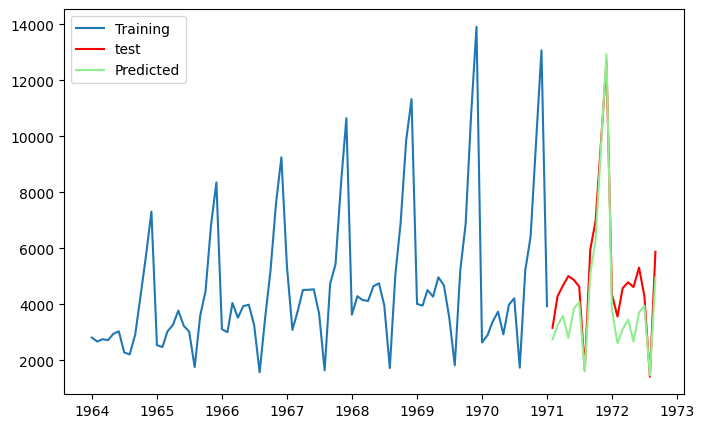

R2_score: 0.8114760153263005


In [8]:
""" == ШАГ 7: прогнозирование на test == """

prediction = pd.DataFrame(arima_model.predict(n_periods=20), index=test.index)
prediction.columns = ['predicted_sales']
display(prediction.head())

# Строим график
plt.figure(figsize=(8,5))
plt.plot(Train, label='Training')
plt.plot(test, label='test', color='red')
plt.plot(prediction, label='Predicted', color='lightgreen')
plt.legend(loc=2)
plt.show();

# Определяем r2_score
from sklearn.metrics import r2_score

r_two = r2_score(test['Champagne sales'], prediction['predicted_sales'])
print("R2_score:", r_two)